# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que uma empresa Hashtag investe: TV, Jornal e Rádio

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

#### Importar a Base de dados

In [1]:
import pandas as pd

df = pd.read_csv("advertising.csv")
display(df)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


None

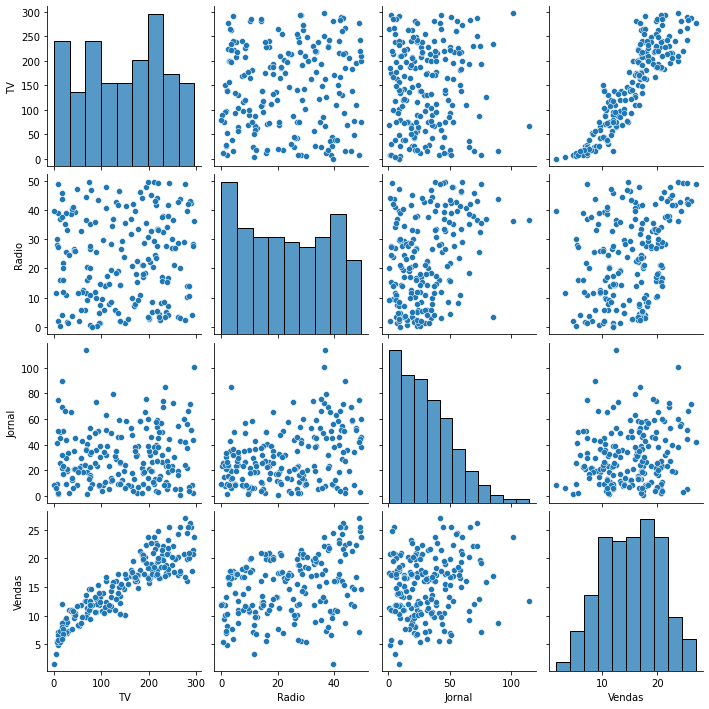

In [2]:
display(df.info())

import matplotlib.pyplot as plt
import seaborn as sns

 
# Vamos usar o gráfico de dispersão
sns.pairplot(df)
plt.show()



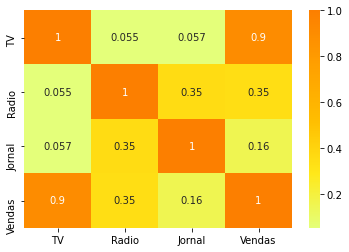

In [3]:
#mapa de calor

sns.heatmap(df.corr(), cmap = 'Wistia', annot= True)
plt.show()

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [9]:
from sklearn.model_selection import train_test_split
x = df.drop("Vendas", axis =1)
y = df['Vendas']
x_train, x_test, y_train, y_test = (train_test_split (x, y, test_size = 0.3, random_state = 1))

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics 
import numpy as np

#Treino AI

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)

RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece
- Também vamos olhar o MSE (Erro Quadrático Médio) -> diz o quanto o nosso modelo "erra" quando tenta fazer uma previsão

In [13]:
# teste AI
test_pred_lin = lin_reg.predict(x_test)
test_pred_rf = rf_reg.predict(x_test)

r2_lin = metrics.r2_score(y_test, test_pred_lin)
mse_lin = metrics.mean_squared_error(y_test, test_pred_lin)
print(f"R² da Regressão Linear: {r2_lin}")
print(f"MSE da Regressão Linear: {mse_lin}")
r2_rf= metrics.r2_score(y_test, test_pred_rf)
mse_rf = metrics.mean_squared_error(y_test, test_pred_rf)
print(f"R² do Random Forest: {r2_rf}")
print(f"MSE do Random Forest: {mse_rf}")

R² da Regressão Linear: 0.9071151423684273
MSE da Regressão Linear: 2.3706599712256566
R² do Random Forest: 0.9631811063934269
MSE do Random Forest: 0.9397126666666676


#### Visualização Gráfica das Previsões

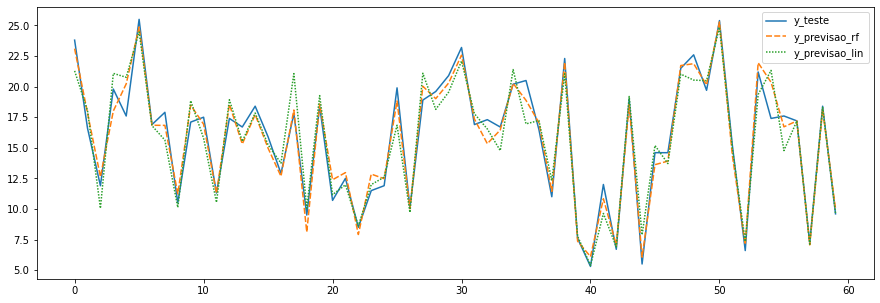

,y_teste,y_previsao_rf,y_previsao_lin
0,23.8,23.104,21.288161
1,16.6,17.845,18.042132
2,11.9,12.631,10.059590
3,19.8,18.004,21.082241
4,17.6,20.226,20.764760
5,25.5,24.877,24.471874
6,16.9,16.842,16.806436
7,17.9,16.833,15.628857
8,10.5,11.232,10.124799
9,17.1,18.486,18.846019


In [20]:
df_resultado = pd.DataFrame()
df_resultado['y_teste'] = y_test
df_resultado['y_previsao_rf'] = test_pred_rf
df_resultado['y_previsao_lin'] = test_pred_lin
# display(df_resultado)
df_resultado = df_resultado.reset_index(drop=True)
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_resultado)
plt.show()
display(df_resultado)


#### Qual a importância de cada variável para as vendas?

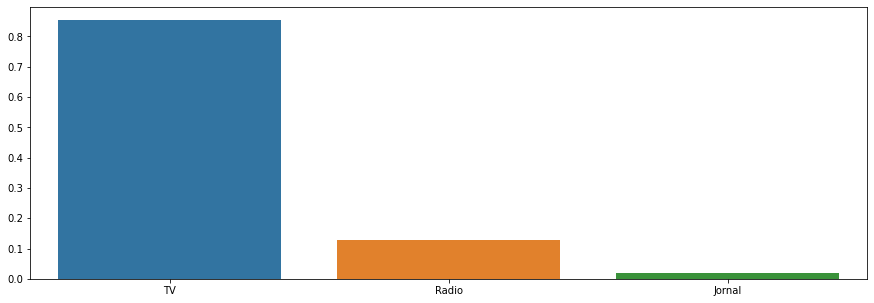

In [16]:
importancia_features = pd.DataFrame(rf_reg.feature_importances_, x_train.columns)
plt.figure(figsize=(15, 5))
sns.barplot(x=x_train.columns, y=rf_reg.feature_importances_)
plt.show()

#### Será que estamos investindo certo?

In [23]:
print(df[["Radio","Jornal"]].sum())

Radio     4652.8
Jornal    6110.8
dtype: float64
